In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pennylane import numpy as np
import jax
import jax.numpy as jnp
import pickle
import pandas as pd
from collections import defaultdict
import re
from itertools import combinations
from scipy.stats import wilcoxon
from models.pennylane_models import *

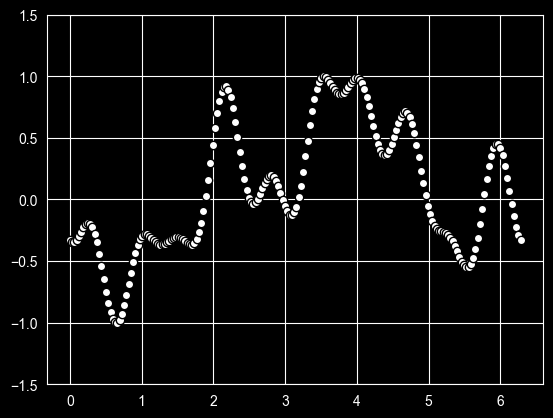

In [3]:
# coeffs = [
#     (1.29 + 1.13j),  # c_1
#     (0.43 + 0.89j),  # c_2
#     (1.97 + 1.03j),  # c_3
#     (0.17 + 0.59j),  # c_4
#     (1.71 + 1.41j),  # c_5
#     (0.61 + 0.37j),  # c_6
#     (1.19 + 1.67j),  # c_7
#     (0.73 + 1.61j),  # c_8
#     (0.23 + 0.47j),  # c_9
#     (1.83 + 0.83j),  # c_10
# ]

coeffs = jnp.array([
    -0.37241954 + 0.23431538j,
    -0.00768933 - 0.02899783j,
    0.2424051 + 0.09402002j,
    -0.00968506 - 0.00708517j,
    0.09149331 + 0.1890211j,
    0.00709596 - 0.00369423j,
    -0.06186681 - 0.07209367j,
    -0.06571778 + 0.02410754j,
    0.00288075 + 0.0052632j,
    -0.15736917 - 0.0288954j], dtype=jnp.complex64)

c0 = 0.0
scaling = 1


def target_function(x):
    res = c0
    for idx, c in enumerate(coeffs):
        exponent = scaling * (idx + 1) * x * 1j
        conj_c = jnp.conjugate(c)
        res += c * jnp.exp(exponent) + conj_c * jnp.exp(-exponent)
    return jnp.real(res)


def minmax_scaler(y):
    # Scale y to [0, 1]
    y_min = jnp.min(y)
    y_max = jnp.max(y)
    y_scaled = (y - y_min) / (y_max - y_min)
    return y_scaled

x_raw = jnp.linspace(-12, 12, 200)
x = minmax_scaler(x_raw) * 2 * jnp.pi
target_y = jax.vmap(target_function)(x)

target_y_scaled = minmax_scaler(target_y) * 2 - 1

# plt.plot(x, target_y, c="black")
plt.scatter(x, target_y_scaled, facecolor="white", edgecolor="black")
plt.ylim(-1.5, 1.5)
plt.show()

In [4]:
seeds = [17, 23, 42, 73, 101, 137, 199, 241, 313, 409]

predictions_r2scores_basic_models_nondiff = defaultdict(list)
predictions_r2scores_basic_models_fourier = defaultdict(list)

predictions_r2scores_basic_serial_models_nondiff = {}
predictions_r2scores_basic_parallel1_models_nondiff = {}
predictions_r2scores_basic_parallel2_models_nondiff = {}
predictions_r2scores_basic_controlled1_models_nondiff = {}
predictions_r2scores_basic_controlled2_models_nondiff = {}
predictions_r2scores_basic_ising_models_nondiff = {}

predictions_r2scores_basic_serial_models_fourier = {}
predictions_r2scores_basic_parallel_models_fourier = {}
predictions_r2scores_basic_controlled1_models_fourier = {}
predictions_r2scores_basic_controlled2_models_fourier = {}
predictions_r2scores_basic_ising1_models_fourier = {}
predictions_r2scores_basic_ising2_models_fourier = {}

costs_test_basic_models_nondiff = defaultdict(list)
costs_test_basic_models_fourier = defaultdict(list)

costs_test_basic_serial_models_nondiff = {}; costs_train_basic_serial_models_nondiff = {}
costs_test_basic_parallel1_models_nondiff = {}
costs_test_basic_parallel2_models_nondiff = {}
costs_test_basic_controlled1_models_nondiff = {}
costs_test_basic_controlled2_models_nondiff = {}
costs_test_basic_ising_models_nondiff = {}

costs_test_basic_serial_models_fourier = {}
costs_test_basic_parallel_models_fourier = {}
costs_test_basic_controlled1_models_fourier = {}
costs_test_basic_controlled2_models_fourier = {}
costs_test_basic_ising1_models_fourier = {}
costs_test_basic_ising2_models_fourier = {}

for s in seeds:

    # with open(f"preds_and_r2/2D_models/fourier_2D_cauchy_0/serial/predictions_r2scores_exponential_degree10_seed{s}", "rb") as f:
    #     predictions_r2scores_basic_serial_models_fourier[s] = pickle.load(f)
    with open(f"preds_and_r2/2D_models/fourier_2D_cauchy_0/parallel/predictions_r2scores_exponential_degree10_seed{s}", "rb") as f:
        predictions_r2scores_basic_parallel_models_fourier[s] = pickle.load(f)
    with open(f"preds_and_r2/2D_models/fourier_2D_cauchy_0/controlled/predictions_r2scores_exponential_degree10_seed{s}", "rb") as f:
        predictions_r2scores_basic_controlled1_models_fourier[s] = pickle.load(f)
    with open(f"preds_and_r2/2D_models/fourier_2D_cauchy_0/ising/predictions_r2scores_exponential_degree10_seed{s}", "rb") as f:
        predictions_r2scores_basic_ising1_models_fourier[s] = pickle.load(f)

    # with open(f"preds_and_r2/final_runs/costs_test_exponential_degree10_seed{s}", "rb") as f:
    #     costs_test_basic_serial_models_nondiff[s] = pickle.load(f)
    # with open(f"preds_and_r2/final_runs/costs_train_exponential_degree10_seed{s}", "rb") as f:
    #     costs_train_basic_serial_models_nondiff[s] = pickle.load(f)
    # with open(f"preds_and_r2/final_runs/parallel_2/costs_test_exponential_degree10_seed{s}_parallel3", "rb") as f:
    #     costs_test_basic_parallel1_models_nondiff[s] = pickle.load(f)
    # with open(f"preds_and_r2/final_runs/parallel_2/costs_test_exponential_degree10_seed{s}_parallel2", "rb") as f:
    #     costs_test_basic_parallel2_models_nondiff[s] = pickle.load(f)
    # with open(f"preds_and_r2/final_runs/controlled_1/costs_test_exponential_degree10_seed{s}_controlled1", "rb") as f:
    #     costs_test_basic_controlled1_models_nondiff[s] = pickle.load(f)
    # with open(f"preds_and_r2/final_runs/controlled_2/costs_test_exponential_degree10_seed{s}_parallel2", "rb") as f:
    #     costs_test_basic_controlled2_models_nondiff[s] = pickle.load(f)
    # with open(f"preds_and_r2/final_runs/ising/costs_test_exponential_degree10_seed{s}_controlled1", "rb") as f:
    #     costs_test_basic_ising_models_nondiff[s] = pickle.load(f)

    # with open(f"preds_and_r2/2D_models/fourier_2D_cauchy_0/serial/costs_test_exponential_degree10_seed{s}", "rb") as f:
    #     costs_test_basic_serial_models_fourier[s] = pickle.load(f)
    # with open(f"preds_and_r2/2D_models/fourier_2D_cauchy_0/parallel/costs_test_exponential_degree10_seed{s}_controlled1", "rb") as f:
    #     costs_test_basic_parallel_models_fourier[s] = pickle.load(f)
    # with open(f"preds_and_r2/2D_models/fourier_2D_cauchy_0/controlled/costs_test_exponential_degree10_seed{s}_1", "rb") as f:
    #     costs_test_basic_controlled1_models_fourier[s] = pickle.load(f)
    # with open(f"preds_and_r2/2D_models/fourier_2D_cauchy_0/controlled/costs_test_exponential_degree10_seed{s}_2", "rb") as f:
    #     costs_test_basic_controlled2_models_fourier[s] = pickle.load(f)
    # with open(f"preds_and_r2/2D_models/fourier_2D_cauchy_0/ising/costs_test_exponential_degree10_seed{s}_1", "rb") as f:
    #     costs_test_basic_ising1_models_fourier[s] = pickle.load(f)
    # with open(f"preds_and_r2/2D_models/fourier_2D_cauchy_0/ising/costs_test_exponential_degree10_seed{s}_2", "rb") as f:
    #     costs_test_basic_ising2_models_fourier[s] = pickle.load(f)

for d in (predictions_r2scores_basic_serial_models_nondiff, predictions_r2scores_basic_parallel1_models_nondiff,
          predictions_r2scores_basic_parallel2_models_nondiff, predictions_r2scores_basic_controlled1_models_nondiff,
          predictions_r2scores_basic_controlled2_models_nondiff, predictions_r2scores_basic_ising_models_nondiff):
    for key, value in d.items():
        predictions_r2scores_basic_models_nondiff[key].extend(value)

for d in (predictions_r2scores_basic_serial_models_fourier, predictions_r2scores_basic_parallel_models_fourier,
          predictions_r2scores_basic_controlled1_models_fourier, predictions_r2scores_basic_controlled2_models_fourier,
          predictions_r2scores_basic_ising1_models_fourier, predictions_r2scores_basic_ising2_models_fourier):
    for key, value in d.items():
        predictions_r2scores_basic_models_fourier[key].extend(value)

# for d in (costs_test_basic_serial_models_nondiff, costs_test_basic_parallel1_models_nondiff,
#           costs_test_basic_parallel2_models_nondiff, costs_test_basic_controlled1_models_nondiff,
#           costs_test_basic_controlled2_models_nondiff, costs_test_basic_ising_models_nondiff):
#     for key, value in d.items():
#         costs_test_basic_models_nondiff[key].extend(value)
#
# for d in (costs_test_basic_serial_models_fourier, costs_test_basic_parallel_models_fourier,
#           costs_test_basic_controlled1_models_fourier, costs_test_basic_controlled2_models_fourier,
#           costs_test_basic_ising1_models_fourier, costs_test_basic_ising2_models_fourier):
#     for key, value in d.items():
#         costs_test_basic_models_fourier[key].extend(value)

In [5]:
dpi = 500
image_save_dpi = 1200

import matplotlib_inline

%matplotlib inline
%matplotlib inline

import matplotlib.pyplot as plt

matplotlib_inline.backend_inline.set_matplotlib_formats('retina')
%config InlineBackend.figure_formats = ['svg']

import seaborn as sns
import matplotlib

sns.set(rc={"figure.dpi": dpi, 'savefig.dpi': dpi})
sns.set_context('notebook')
sns.set_style("ticks")
matplotlib.rcParams["figure.dpi"] = dpi
plt.rcParams['figure.dpi'] = dpi

C:\Users\test\AppData\Local\Temp\ipykernel_11580\1297260415.py:69: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab20", 3)


[0.2899048  0.85351294 0.9845211  0.98699903 0.9885214  0.9885206
 0.9894442  0.99068624 0.99141693 0.9910721  0.991675   0.99230784
 0.9922285  0.9930107  0.9921388  0.99305594 0.9933732  0.9929922 ] [ 31.  67. 103. 139. 175. 211. 247. 283. 319. 355. 391. 427. 463. 499.
 535. 571. 607. 643.]


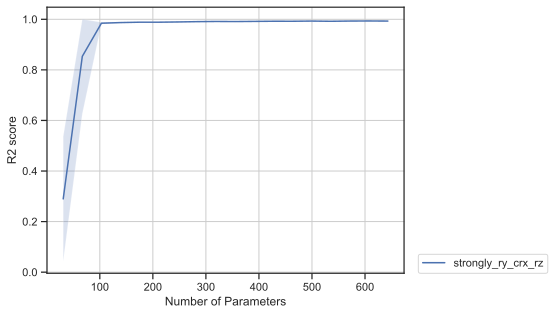

In [11]:
models = {"":0}
results = {"":0}

for seed in predictions_r2scores_basic_models_fourier.values():
    for _, r2_train, r2_test, name, d, _ in seed:
        # if ("all_ry_r" in name) or ("basic_ry_cr" in name):
        if ("str" in name) and ("cr" in name):#  or ("ry_rxx_rz" in name) or ("ry_crx_rz" in name)):
                # and ("z_rxx_rz" not in name) and ("z_ryy_rz" not in name) and ("x_ryy_rx" not in name) and ("x_rzz_rx" not in name)):
            name = name[:-19] if "serial" not in name else name.replace("cnot_", "")

            if ("cnot" in name) and ("down" in name):
                name = "ata_pair" + name[-14:]
            elif ("cnot" in name) and ("all" in name) and ("down" not in name):
                name = "ata_full" + name[-14:]
            elif ("down" in name):
                name = "ata_pair" + name[-10:]
            elif ("all" in name) and ("down" not in name):
                name = "ata_full" + name[-10:]

            if name not in results:
                results.update({name:[]})
            name += f"{d}"
            if name in models.keys():
                models[name].append([r2_train, d])
            else:
                models.update({name: [[r2_train, d]]})

models.pop("")
results.pop("")

for key, value in models.items():
    d = value[0][1]
    r2s = jnp.array(value)[:,0]
    mean_r2 = jnp.mean(r2s)
    std_r2 = jnp.std(r2s)
    name = key.replace(f"{d}", "")
    results[name].append([mean_r2, std_r2, d])

threshold = 0.87

fastest_param = {}   # smallest params where mean r2 >= threshold
max_r2        = {}   # maximum mean r2 across depths

for key, value in results.items():
    arr    = jnp.array(value)
    means  = arr[:, 0]  # mean r2
    params = arr[:, 2]  # number of parameters

    # second sort key: best achieved r2
    max_r2[key] = float(means.max())

    # first sort key: first parameter count where r2 >= threshold
    hitting_params = jnp.where(means >= threshold, params, jnp.inf)
    first_param = float(hitting_params.min())  # inf if never reaches 0.95
    fastest_param[key] = first_param

# sort:
#   1) by first_param (ascending: fewer params = better)
#   2) by max_r2 (descending: higher best R² = better)
sorted_keys = sorted(
    results.keys(),
    key=lambda k: (fastest_param[k], -max_r2[k])
)
# results2 = [0, 1, 2]
# results2[0] = sorted_keys[1]
# results2[1] = sorted_keys[2]
# results2[2] = sorted_keys[0]
# ---- plotting in that order ----
cmap = plt.cm.get_cmap("tab20", 3)

idx = 0
for key in results:
    color = cmap(idx)
    value  = results[key]
    means  = jnp.array(value)[:, 0]
    stds   = jnp.array(value)[:, 1]
    params = jnp.array(value)[:, 2]
    idx += 1

    print(means, params)
    plt.plot(params, means, label=key)
    plt.fill_between(params, means - stds, means + jnp.minimum(stds, 1 - means), alpha=0.2)


plt.grid()
# plt.xlim(1, 680)
#plt.ylim(0.8, 1.005)
# plt.yticks(jnp.arange(0.48, 1.002, 0.04))
plt.xlabel("Number of Parameters")
plt.ylabel("R2 score")
plt.legend(loc=(1.04, 0))
plt.savefig("basic_2D.svg", dpi=600, bbox_inches="tight")
plt.show()

In [326]:
def split_name(name: str):

    m = re.match(r"^(.*)_(r[xyz]|cr[xyz])_(r[xyz]|cr[xyz])_(r[xyz]|cr[xyz])_(.*)$", name)
    if not m:
        raise ValueError(f"Cannot parse rotation triple from name: {name}")
    prefix, r1, r2, r3, suffix = m.groups()
    base = f"{prefix}_{suffix}"
    rots = "_".join([r1, r2, r3])
    return base, rots
# scores[base][rot][depth] = list of r2_test over seeds
scores = defaultdict(lambda: defaultdict(lambda: defaultdict(list)))


for seed_runs in predictions_r2scores_basic_models_fourier.values():
    for _, r2_train, r2_test, name, d, _ in seed_runs:
        if ("" in name) and ("cr" in name) and ("" in name):#  and (("z_crx_ry" in name) or ("z_cry_rz" in name)):
            name = name[:-19] if "serial" not in name else name.replace("cnot_", "")
            name = name + "_"
            base, rot = split_name(name)
            scores[base][rot][d].append(r2_train)

base = "basic_cnot_"
# [211. 411. 611.], [121. 231. 341. 451. 561. 671.], [ 51. 91. 131. 171. 211. 251. 291. 331. 371. 411. 451. 491. 531. 571. 611. 651.]
# [211. 431. 651.], [121. 251. 381. 511. 641.], [ 51. 111. 171. 231. 291. 351. 411. 471. 531. 591. 651.]
depth = 273

rotations = sorted(scores[base].keys())

results_wilcoxon = []

for r1, r2 in combinations(rotations, 2):
    r2_a = jnp.array(scores[base][r1][depth])
    r2_b = jnp.array(scores[base][r2][depth])

    # ensure we have paired samples (same number of seeds)
    if r2_a.shape != r2_b.shape:
        print(f"Skipping {r1} vs {r2} at depth {depth}: different number of seeds")
        continue

    stat, p = wilcoxon(r2_a, r2_b, alternative="two-sided")
    results_wilcoxon.append((r1, r2, stat, p))

# sort by p-value (smallest p = strongest difference)
results_wilcoxon.sort(key=lambda t: t[3])

for r1, r2, stat, p in results_wilcoxon:
    print(f"{base}: {r1} vs {r2} at depth {depth}: "
          f"stat={stat:.3g}, p={p:.3g}")
print(len(results_wilcoxon))

basic_cnot_: rx_ry_rx vs ry_rz_ry at depth 273: stat=0, p=0.00195
basic_cnot_: rx_ry_rx vs rz_ry_rx at depth 273: stat=0, p=0.00195
basic_cnot_: rx_ry_rz vs rx_rz_rx at depth 273: stat=0, p=0.00195
basic_cnot_: rx_rz_rx vs rx_rz_ry at depth 273: stat=0, p=0.00195
basic_cnot_: rx_rz_rx vs ry_rz_ry at depth 273: stat=0, p=0.00195
basic_cnot_: rx_rz_rx vs rz_rx_ry at depth 273: stat=0, p=0.00195
basic_cnot_: rx_rz_rx vs rz_ry_rx at depth 273: stat=0, p=0.00195
basic_cnot_: rx_rz_rx vs rz_ry_rz at depth 273: stat=0, p=0.00195
basic_cnot_: ry_rz_ry vs rz_rx_rz at depth 273: stat=0, p=0.00195
basic_cnot_: rz_rx_rz vs rz_ry_rz at depth 273: stat=0, p=0.00195
basic_cnot_: rx_ry_rx vs ry_rx_rz at depth 273: stat=1, p=0.00391
basic_cnot_: rx_ry_rx vs ry_rz_rx at depth 273: stat=1, p=0.00391
basic_cnot_: rx_ry_rx vs rz_ry_rz at depth 273: stat=1, p=0.00391
basic_cnot_: rx_ry_rz vs rz_rx_rz at depth 273: stat=1, p=0.00391
basic_cnot_: rx_rz_rx vs ry_rx_rz at depth 273: stat=1, p=0.00391
basic_cnot

In [204]:
scores_by_depth = defaultdict(list)

for seed_id, seed_runs in predictions_r2scores_basic_models_fourier.items():
    for _, r2_train, r2_test, name, d, _ in seed_runs:
        if ("serial_cnot_rx_ry_rz" in name) or ("serial_rx_ry_rz" in name):
            # scores_by_depth[d].append(r2_train)
            scores_by_depth[d].append(r2_test)

depth1 = 99
depth2 = 165

r2_d1 = jnp.array(scores_by_depth[depth1])
r2_d2 = jnp.array(scores_by_depth[depth2])

# sanity check: same number of seeds
assert r2_d1.shape == r2_d2.shape, "Depths must have same number of seed runs"

stat, p = wilcoxon(r2_d1, r2_d2, alternative="two-sided", method="exact")
print(f"Wilcoxon, depth {depth1} vs {depth2}: stat={stat:.3g}, p={p:.3g}")
print(jnp.mean(r2_d1), jnp.mean(r2_d2))
print(jnp.std(r2_d1), jnp.std(r2_d2))

Wilcoxon, depth 99 vs 165: stat=1, p=0.00391
0.9999922 0.99865323
1.0523621e-05 0.0017278102


In [441]:
def pair_depths_by_nearest(depths1, depths2, tol_abs=None, tol_rel=None):
    depths1 = sorted(depths1)
    depths2 = sorted(depths2)
    used2 = set()
    pairs = []

    for d1 in depths1:
        # find best matching d2
        candidates = [(abs(d2 - d1), d2) for d2 in depths2 if d2 not in used2]
        if not candidates:
            continue
        diff, d2_best = min(candidates)

        if tol_abs is not None and diff > tol_abs:
            continue
        if tol_rel is not None and diff > tol_rel * max(d1, d2_best):
            continue

        pairs.append((d1, d2_best))
        used2.add(d2_best)

    return pairs



pairs = pair_depths_by_nearest(scores["all_to_all_"][r1].keys(),
                               scores["basic_"][r2].keys(),
                               tol_abs=20)  # example: max diff 20 params

means1 = []
means2 = []
for d1, d2 in pairs:
    r2_a = jnp.array(scores["all_to_all_"][r1][d1])
    r2_b = jnp.array(scores["basic_"][r2][d2])
    means1.append(float(r2_a.mean()))
    means2.append(float(r2_b.mean()))

if len(means1) >= 2:
    stat, p = wilcoxon(means1, means2, alternative="two-sided")

for r1, r2, stat, p in results_wilcoxon:
    print(f"{base}: {r1} vs {r2} at depth {depth}: "
          f"stat={stat:.3g}, p={p:.3g}")
print(len(results_wilcoxon))


basic_cnot_: rx_ry_rx vs ry_rz_ry at depth 273: stat=0, p=0.00195
basic_cnot_: rx_ry_rx vs rz_ry_rx at depth 273: stat=0, p=0.00195
basic_cnot_: rx_ry_rz vs rx_rz_rx at depth 273: stat=0, p=0.00195
basic_cnot_: rx_rz_rx vs rx_rz_ry at depth 273: stat=0, p=0.00195
basic_cnot_: rx_rz_rx vs ry_rz_ry at depth 273: stat=0, p=0.00195
basic_cnot_: rx_rz_rx vs rz_rx_ry at depth 273: stat=0, p=0.00195
basic_cnot_: rx_rz_rx vs rz_ry_rx at depth 273: stat=0, p=0.00195
basic_cnot_: rx_rz_rx vs rz_ry_rz at depth 273: stat=0, p=0.00195
basic_cnot_: ry_rz_ry vs rz_rx_rz at depth 273: stat=0, p=0.00195
basic_cnot_: rz_rx_rz vs rz_ry_rz at depth 273: stat=0, p=0.00195
basic_cnot_: rx_ry_rx vs ry_rx_rz at depth 273: stat=1, p=0.00391
basic_cnot_: rx_ry_rx vs ry_rz_rx at depth 273: stat=1, p=0.00391
basic_cnot_: rx_ry_rx vs rz_ry_rz at depth 273: stat=1, p=0.00391
basic_cnot_: rx_ry_rz vs rz_rx_rz at depth 273: stat=1, p=0.00391
basic_cnot_: rx_rz_rx vs ry_rx_rz at depth 273: stat=1, p=0.00391
basic_cnot

serial_cnot_: rx_rz_ry vs rz_rx_ry at depth 165: stat=1, p=0.00391
serial_cnot_: rz_rx_ry vs rz_ry_rz at depth 165: stat=3, p=0.00977
serial_cnot_: rx_rz_ry vs ry_rx_rz at depth 165: stat=6, p=0.0273
serial_cnot_: rz_rx_ry vs rz_rx_rz at depth 165: stat=7, p=0.0371
serial_cnot_: rx_rz_rx vs rx_rz_ry at depth 165: stat=8, p=0.0488
serial_cnot_: ry_rx_rz vs rz_rx_ry at depth 165: stat=8, p=0.0488
serial_cnot_: ry_rx_ry vs rz_rx_ry at depth 165: stat=9, p=0.0645
serial_cnot_: rz_rx_ry vs rz_ry_rx at depth 165: stat=11, p=0.105
serial_cnot_: rx_ry_rz vs rz_rx_ry at depth 165: stat=12, p=0.131
serial_cnot_: ry_rx_rz vs rz_rx_rz at depth 165: stat=12, p=0.131
serial_cnot_: rx_ry_rx vs rz_ry_rz at depth 165: stat=13, p=0.16
serial_cnot_: rx_rz_ry vs rz_ry_rx at depth 165: stat=13, p=0.16
serial_cnot_: rz_rx_rz vs rz_ry_rx at depth 165: stat=13, p=0.16
serial_cnot_: rx_rz_rx vs rz_rx_rz at depth 165: stat=14, p=0.193
serial_cnot_: rx_rz_rx vs rz_ry_rz at depth 165: stat=14, p=0.193
serial_cnot

C:\Users\test\AppData\Local\Temp\ipykernel_22312\1856258007.py:138: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


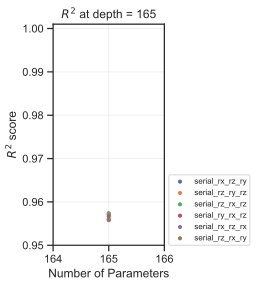

In [145]:
def split_name(name: str):

    m = re.match(r"^(.*)_(r[xyz]|cr[xyz])_(r[xyz]|cr[xyz])_(r[xyz]|cr[xyz])_(.*)$", name)
    if not m:
        raise ValueError(f"Cannot parse rotation triple from name: {name}")
    prefix, r1, r2, r3, suffix = m.groups()
    base = f"{prefix}_{suffix}"
    rots = "_".join([r1, r2, r3])
    return base, rots

# scores[base][rot][depth] = list of r2_test over seeds
scores = defaultdict(lambda: defaultdict(lambda: defaultdict(list)))

for seed_runs in predictions_r2scores_basic_models_nondiff.values():
    for _, r2_train, r2_test, name, d, _ in seed_runs:
        if "serial" not in name:
            continue
        base, rot = split_name(name + "_")
        scores[base][rot][d].append(r2_train)

base  = "serial_cnot_"
depth = 165

rotations = sorted(scores[base].keys())

results_wilcoxon = []

for r1, r2 in combinations(rotations, 2):
    r2_a = jnp.array(scores[base][r1][depth])
    r2_b = jnp.array(scores[base][r2][depth])

    if r2_a.shape != r2_b.shape:
        print(f"Skipping {r1} vs {r2} at depth {depth}: different number of seeds")
        continue

    stat, p = wilcoxon(r2_a, r2_b, alternative="two-sided")
    results_wilcoxon.append((r1, r2, stat, p))

results_wilcoxon.sort(key=lambda t: t[3])

for r1, r2, stat, p in results_wilcoxon:
    print(f"{base}: {r1} vs {r2} at depth {depth}: stat={stat:.3g}, p={p:.3g}")

print("Total comparisons:", len(results_wilcoxon))

# build set of rotation triples that are involved in significant differences
alpha = 0.05
significant_rots = set()
for r1, r2, stat, p in results_wilcoxon:
    if p < alpha:
        significant_rots.add(r1)
        significant_rots.add(r2)

print("Significant rotation triples:", significant_rots)

models  = {"": 0}
results = {"": 0}

for seed in predictions_r2scores_basic_models_nondiff.values():
    for _, r2_train, r2_test, name, d, _ in seed:
        if "serial" not in name:
            continue

        # extract rotation triple from this name
        _, rot = split_name(name + "_")

        if rot not in significant_rots:
            continue

        # name cleanup
        cleaned = name[:-19] if "serial" not in name else name.replace("cnot_", "")

        if cleaned not in results:
            results[cleaned] = []

        key_with_depth = cleaned + f"{d}"
        if key_with_depth in models:
            models[key_with_depth].append([r2_train, d])
        else:
            models[key_with_depth] = [[r2_train, d]]

models.pop("")
results.pop("")

for key, value in models.items():
    d    = value[0][1]
    r2s  = jnp.array(value)[:, 0]
    mean_r2 = jnp.mean(r2s)
    std_r2  = jnp.std(r2s)
    # strip depth again
    cleaned = key.replace(f"{d}", "")
    results[cleaned].append([mean_r2, std_r2, d])

points = []  # (label, params, mean_r2, std_r2)

for name, vals in results.items():
    arr = jnp.array(vals)  # shape (num_depths, 3) -> [mean_r2, std_r2, d]
    means  = arr[:, 0]
    stds   = arr[:, 1]
    params = arr[:, 2]

    # find index where depth matches
    mask = (params == depth)
    if not mask.any():
        continue

    idx = int(jnp.where(mask)[0][0])

    mean_r2 = float(means[idx])
    std_r2  = float(stds[idx])
    p       = int(params[idx])

    points.append((name, p, mean_r2, std_r2))

# sort by highest mean R² at this depth (descending)
points.sort(key=lambda t: t[2], reverse=True)

# ---- plotting ----
plt.figure(figsize=(2, 4))

for name, p, mean_r2, std_r2 in points:
    # scatter with vertical errorbar
    plt.scatter(
        p,
        mean_r2,
        label=name,
        s=10
    )

plt.grid(alpha=0.3)
plt.ylim(0.95, 1.001)
plt.xlim(164, 166)
plt.xlabel("Number of Parameters")
plt.ylabel(r"$R^2$ score")
plt.title(fr"$R^2$ at depth = {depth}")
plt.legend(loc=(1.04, 0), fontsize=8)
plt.tight_layout()
plt.show()


In [ ]:
depth_of_interest = 231  # e.g. 165, 231, 297, ...

points = []  # (label, params, mean_r2, std_r2)

for name, vals in results.items():
    arr = jnp.array(vals)  # shape (num_depths, 3) -> [mean_r2, std_r2, d]
    means  = arr[:, 0]
    stds   = arr[:, 1]
    params = arr[:, 2]

    # find index where depth matches
    mask = (params == depth_of_interest)
    if not mask.any():
        continue

    idx = int(jnp.where(mask)[0][0])

    mean_r2 = float(means[idx])
    std_r2  = float(stds[idx])
    p       = int(params[idx])

    points.append((name, p, mean_r2, std_r2))

# sort by highest mean r2 at this depth
points.sort(key=lambda t: t[2], reverse=True)

# ---- plotting ----
plt.figure(figsize=(6, 4))

for name, p, mean_r2, std_r2 in points:
    # scatter with vertical errorbar
    plt.errorbar(
        p,
        mean_r2,
        yerr=std_r2,
        fmt="o",
        capsize=3,
        label=name,
    )

plt.grid(alpha=0.3)
plt.ylim(0.8, 1.01)          # adjust if needed
plt.xlabel("Number of Parameters")
plt.ylabel(r"$R^2$ score")
plt.title(fr"$R^2$ at depth = {depth_of_interest}")
plt.legend(loc=(1.04, 0), fontsize=8)
plt.tight_layout()
plt.show()

In [55]:
scores = defaultdict(lambda: defaultdict(lambda: {"train": [], "test": []}))

for seed in predictions_r2scores_basic_models_nondiff.values():
    for _, r2_train, r2_test, name, d, _ in seed:
        if ("all" in name) and ("cnot" in name) and ("down" in name):
            base_name = name[:-19] if "serial" not in name else name.replace("cnot_", "")
            scores[base_name][d]["train"].append(r2_train)
            scores[base_name][d]["test"].append(r2_test)

rows = []

for model_name, depths_dict in scores.items():
    for d, vals in depths_dict.items():
        train_arr = np.array(vals["train"])
        test_arr  = np.array(vals["test"])

        rows.append({
            "model": model_name,
            "depth": int(d),
            "mean_r2_train": float(train_arr.mean()),
            "std_r2_train": float(train_arr.std()),
            "mean_r2_test": float(test_arr.mean()),
            "std_r2_test": float(test_arr.std()),
        })

df = pd.DataFrame(rows)

# sort by depth (ascending), then by mean train R2 (descending)
df = df.sort_values(["depth", "mean_r2_train"],
                    ascending=[True, False]).reset_index(drop=True)

print(df)


                             model  depth  mean_r2_train  std_r2_train  \
0    all_to_all_down_rz_rx_rz_cnot     93       0.814318      0.017283   
1    all_to_all_down_rz_ry_rz_cnot     93       0.814315      0.017314   
2    all_to_all_down_rx_rz_ry_cnot     93       0.814239      0.017230   
3    all_to_all_down_ry_rz_ry_cnot     93       0.814231      0.017299   
4    all_to_all_down_ry_rx_rz_cnot     93       0.814120      0.017197   
..                             ...    ...            ...           ...   
115  all_to_all_down_rz_rx_rz_cnot    633       0.954632      0.007601   
116  all_to_all_down_ry_rz_rx_cnot    633       0.954159      0.007030   
117  all_to_all_down_ry_rx_ry_cnot    633       0.952295      0.009682   
118  all_to_all_down_rx_rz_rx_cnot    633       0.950197      0.010803   
119  all_to_all_down_rx_ry_rx_cnot    633       0.950125      0.008680   

     mean_r2_test  std_r2_test  
0        0.717027     0.124876  
1        0.721141     0.120323  
2        0.7

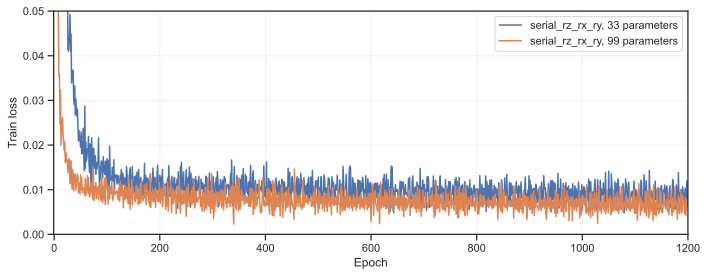

In [312]:
def plot_mean_loss_over_seeds(cost_dict, use_log_y=True):

    # grouped[base_name][num_params] = [costs_seed1, costs_seed2, ...]
    grouped = defaultdict(lambda: defaultdict(list))

    for seed in cost_dict.values():
        for costs, name, num_params, _ in seed: #zxy
            if (("serial_cnot_rz_rx_ry" in name) or ("serial_rz_rx_ry" in name)) and ((num_params == 33) or (num_params == 99)):

                # shorten the name:
                base_name = name[:-19] if "serial" not in name else name.replace("cnot_", "")

                costs_arr = np.asarray(costs, dtype=float)
                grouped[base_name][num_params].append(costs_arr)

    # build curves and sort by final mean loss
    curves = []  # (final_mean_loss, label, epochs, mean_loss, std_loss)

    for base_name, per_depth in grouped.items():
        for num_params, runs in per_depth.items():
            min_len = min(len(r) for r in runs)
            runs_aligned = np.stack([r[:min_len] for r in runs], axis=0)

            mean_loss = runs_aligned.mean(axis=0)
            std_loss  = runs_aligned.std(axis=0)
            epochs    = np.arange(min_len)

            final_mean = float(mean_loss[-2])  # sorting key
            label = f"{base_name}, {num_params} parameters"

            curves.append((final_mean, label, epochs, mean_loss, std_loss))

    # sort by lowest final mean loss
    curves.sort(key=lambda t: t[0])

    # --- plotting ---
    plt.figure(figsize=(10, 4))

    for final_mean, label, epochs, mean_loss, std_loss in curves:
        plt.plot(epochs, mean_loss, label=label)
        # plt.fill_between(epochs, mean_loss - std_loss, mean_loss + std_loss, alpha=0.2)

    if use_log_y:
        plt.yscale("log")

    plt.xlabel("Epoch")
    plt.ylabel("Train loss")
    plt.xlim(-1, 1200)
    plt.ylim(0, 0.05)
    plt.grid(alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.savefig("serial_convergence_nondiff_train.svg", dpi=600, bbox_inches="tight")
    plt.show()

plot_mean_loss_over_seeds(costs_train_basic_serial_models_nondiff, use_log_y=False)